# Homework 3
## Malvika Viswanathan
## February 19 2024

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
# Load prostate data
prostate = pd.read_csv("prostate.csv")
prostate.head()
for col in prostate.columns:
    print(col)

lcavol
lweight
age
lbph
svi
lcp
gleason
pgg45
lpsa
train


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\malvi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


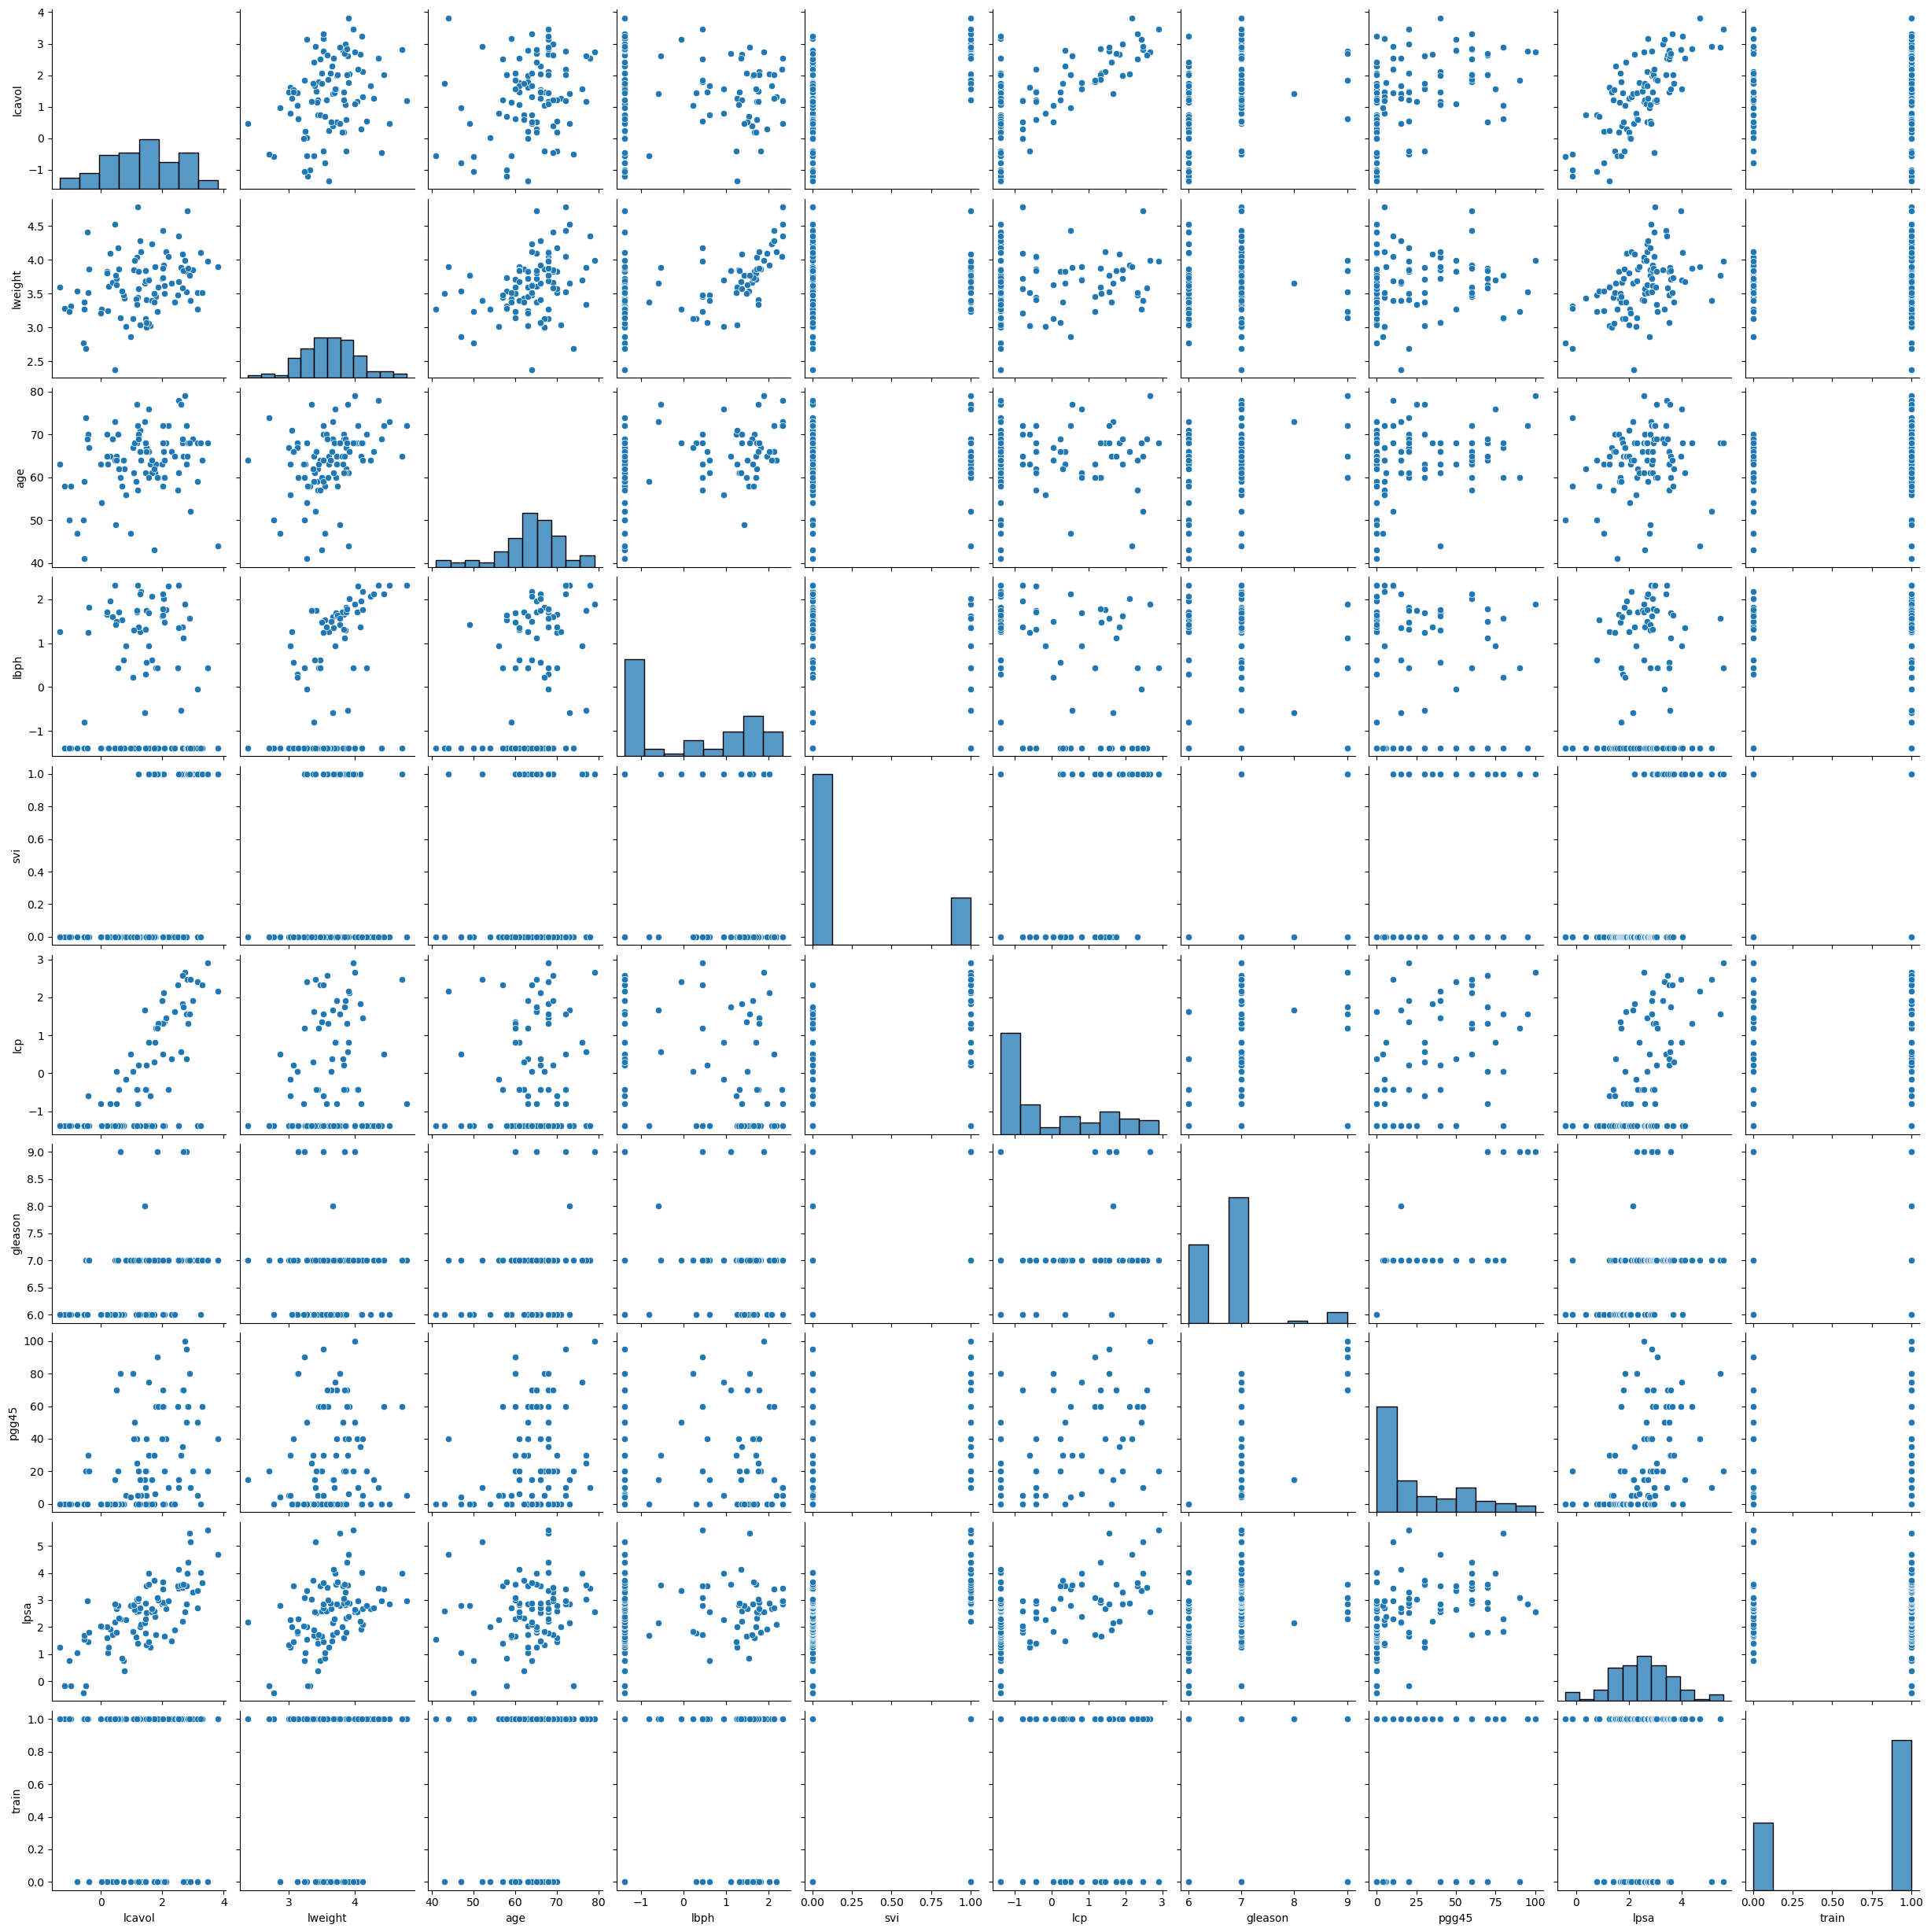

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pairwise relationships
sns.pairplot(prostate, diag_kind='hist')
plt.show()

## Training and testing subset, along with target outcome

In [4]:
# Subset to training and target
prostate_data = prostate.drop('lpsa',axis=1) # all other predictors
prostate_target = prostate['lpsa'] # outcome

# Train test split
X_train = prostate_data.loc[prostate_data['train']==True]
X_test = prostate_data.loc[prostate_data['train']==False]
y_train = prostate_target.loc[prostate_data['train']==True]
y_test = prostate_target.loc[prostate_data['train']==False]
X = X_train
X_train = X_train.iloc[:,0:8]
X_test = X_test.iloc[:,0:8]

In [5]:
X_train

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0
...,...,...,...,...,...,...,...,...
90,3.246491,4.101817,68,-1.386294,0,-1.386294,6,0
91,2.532903,3.677566,61,1.348073,1,-1.386294,7,15
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40


## Training Least Squares Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X_train = X_train.values
X_test = X_test.values

# fitting
model = LinearRegression()
model.fit(X_train, y_train)


# Display the coefficients
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:")
print(coefficients)
print("Intercept:")
print(intercept)

# Predict the target values
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Calculate the residuals
residuals = y_test - y_pred
print("Residuals:")
print(residuals)

# Calculate mean squared error (MSE) on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (MSE) on Training Set:", mse_train)

# Calculate mean squared error on testing set (L2 loss)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on Testing Set:", mse)

Coefficients:
[ 0.57654319  0.61402    -0.01900102  0.14484808  0.73720864 -0.20632423
 -0.02950288  0.00946516]
Intercept:
0.42917013284912375
Residuals:
6    -1.203571
8    -0.122637
9    -0.213860
14   -0.485042
21   -0.886091
24   -0.201099
25   -0.275894
27   -0.014464
31    0.017055
33    0.698077
35   -0.852759
41    0.104429
43    0.208485
47   -0.225774
48   -0.083152
49    0.410943
52    0.282330
53   -0.332273
54   -0.506512
56    1.403678
61   -0.563926
63   -0.825414
64    0.340820
65    0.157894
72    0.415801
73   -0.405595
79    0.341674
83    0.278591
94    2.024228
96    1.819092
Name: lpsa, dtype: float64
Mean Squared Error (MSE) on Training Set: 0.43919976805833433
Mean Squared Error (MSE) on Testing Set: 0.5212740055076017


## Training Ridge regression model with tuning parameter lambda 

In [7]:
from sklearn.linear_model import Ridge

def L2_loss(y, yhat):
    return np.mean((y - yhat) ** 2)

# Define a range of alpha values to test
alphas = np.logspace(-6, 6, 51)

# Store errors for each alpha
train_errors = []
test_errors = []
dof=[]
coef=[]

# Loop through alpha values and fit Ridge regression models
for alpha in alphas:
    
    # Fit Ridge regression model
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    # Predict on training and testing sets
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)
    
    # Calculate average squared error for training and testing sets
    train_error = L2_loss(y_train, y_train_pred)
    test_error = L2_loss(y_test, y_test_pred)

    # Compute the trace of the matrix for degrees of freedom
    trace_dof_matrix = np.trace(X_train @ np.linalg.pinv(X_train.T @ X_train + alpha * np.identity(X_train.shape[1])) @ X_train.T)
    
    # Append to lists
    train_errors.append(train_error)
    test_errors.append(test_error)
    dof.append(trace_dof_matrix)
    coef.append(ridge.coef_)

## Plotting training and testing error as a function of lambda

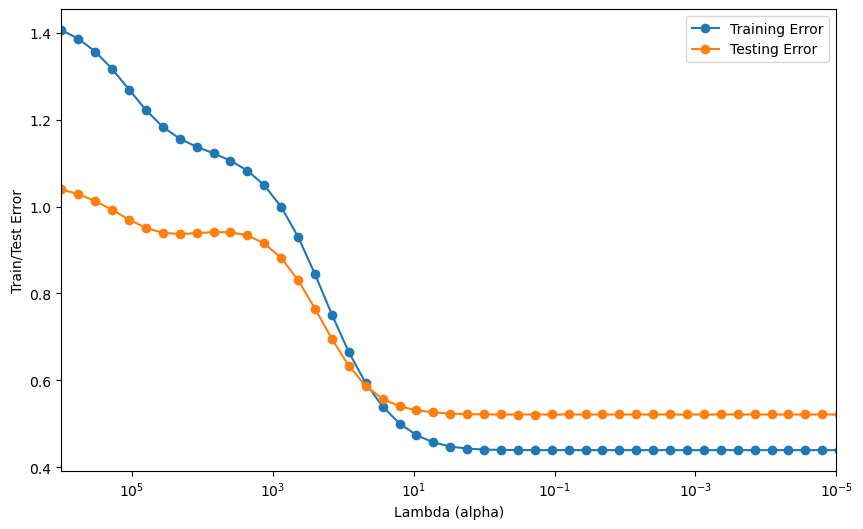

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, marker='o', label='Training Error')
plt.plot(alphas, test_errors, marker='o', label='Testing Error')
plt.xscale('log')  # Use a logarithmic scale for alpha
plt.xlabel('Lambda (alpha)')
plt.ylabel('Train/Test Error')
plt.xlim(10e5,10e-6)
plt.legend()
plt.show()

In [9]:
# alpha that minimizes the test error
best_lambda = alphas[np.where(test_errors == np.min(test_errors))]
print(f'Best lambda: {best_lambda}')

Best lambda: [0.33113112]


## Creating path diagram of ridge regression analysis

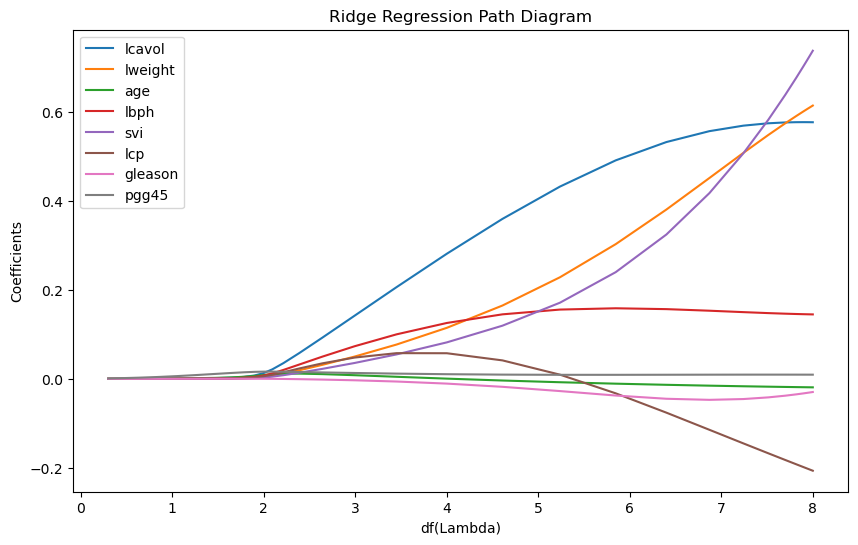

In [10]:
plt.figure(figsize=(10, 6))
X = X.iloc[:,0:8]
for i, feature in enumerate(X.columns):
    plt.plot(dof, [coef[i] for coef in coef], label=feature)
plt.xlabel('df(Lambda)')
plt.ylabel('Coefficients')
plt.title('Ridge Regression Path Diagram')
plt.legend()
plt.show()

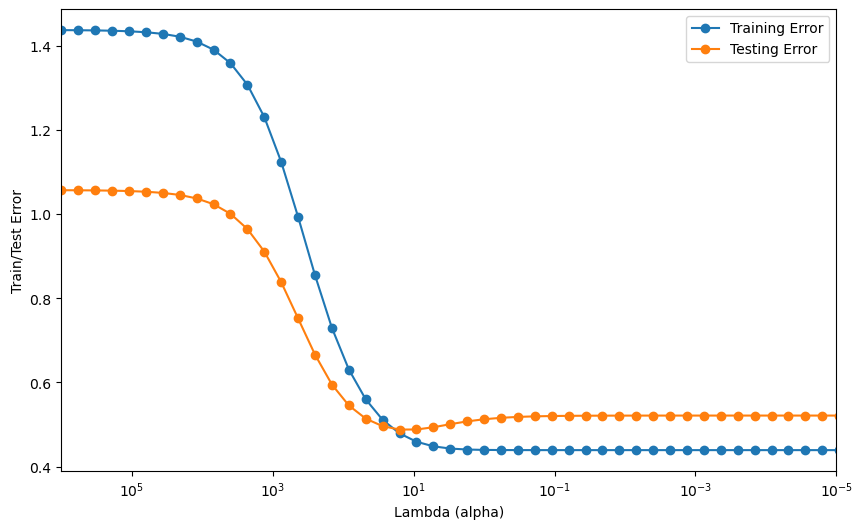

Best lambda: [15.84893192]


In [11]:
# Fit the scaler on the training data and transform it
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import Ridge

def L2_loss(y, yhat):
    return np.mean((y - yhat) ** 2)

# Define a range of alpha values to test
alphas = np.logspace(-6, 6, 51)

# Store errors for each alpha
train_errors = []
test_errors = []
dof=[]
coef=[]

# Loop through alpha values and fit Ridge regression models
for alpha in alphas:
    
    # Fit Ridge regression model
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    # Predict on training and testing sets
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)
    
    # Calculate average squared error for training and testing sets
    train_error = L2_loss(y_train, y_train_pred)
    test_error = L2_loss(y_test, y_test_pred)

    # Compute the trace of the matrix for degrees of freedom
    trace_dof_matrix = np.trace(X_train @ np.linalg.pinv(X_train.T @ X_train + alpha * np.identity(X_train.shape[1])) @ X_train.T)
    
    # Append to lists
    train_errors.append(train_error)
    test_errors.append(test_error)
    dof.append(trace_dof_matrix)
    coef.append(ridge.coef_)
    
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, marker='o', label='Training Error')
plt.plot(alphas, test_errors, marker='o', label='Testing Error')
plt.xscale('log')  # Use a logarithmic scale for alpha
plt.xlabel('Lambda (alpha)')
plt.ylabel('Train/Test Error')
plt.xlim(10e5,10e-6)
plt.legend()
plt.show()    

# alpha that minimizes the test error
best_lambda = alphas[np.where(test_errors == np.min(test_errors))]
print(f'Best lambda: {best_lambda}')

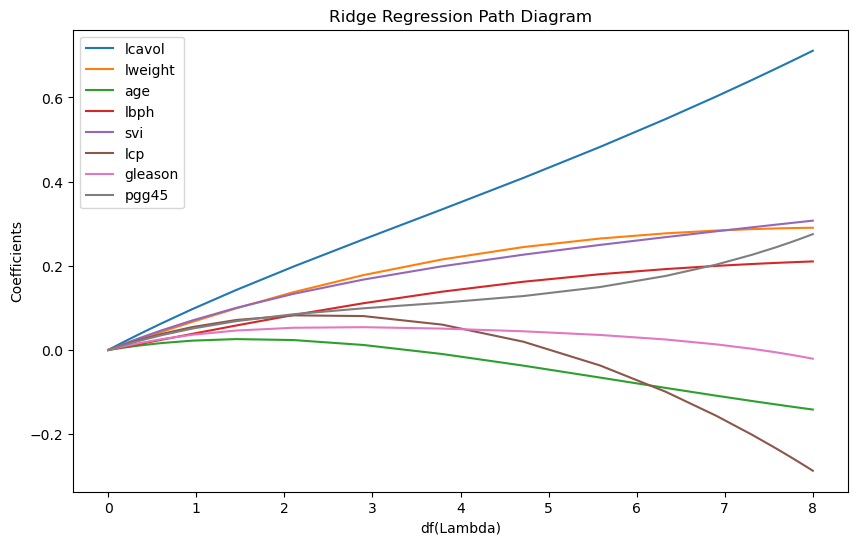

In [12]:
plt.figure(figsize=(10, 6))
X = X.iloc[:,0:8]
for i, feature in enumerate(X.columns):
    plt.plot(dof, [coef[i] for coef in coef], label=feature)
plt.xlabel('df(Lambda)')
plt.ylabel('Coefficients')
plt.title('Ridge Regression Path Diagram')
plt.legend()
plt.show()

The lambda value where the test error is approximately minimized is at lambda = 0.334. When X_train and X_test is Standardized, the best lambda shifts to 15.84. Moreover the degree of freedom where lambda goes to infinity is around df(lambda) = 1, but this shifts to df(lambda)=0 after standardizing data.
Predictors like age, pgg45 and gleason score have coefficients around zero for all the degrees of freedom, while standardizing these values could possibly converted categorical variables into quantitative values, thereby having non zero coefficients for degrees of freedom between 3 and 7.